In [115]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [154]:
alpha = 0.5

def util(xs):
    return xs[0] ** alpha * xs[1] ** (1 - alpha)

def optimizer_fun(xs, ps):
    return (xs[0] * ps[0] + xs[1] * ps[1])

ps = [25, 2]
u0 = 100

def solve(p, u0):
    initial_guess = [0.1, 0.1]
    constraints = ({'type': 'ineq', 'fun': lambda x: util(x) - u0})
    bounds = bounds = [(0, None) for p in ps]
    res = optimize.minimize(optimizer_fun, initial_guess, args=(p), method="SLSQP", constraints = constraints, bounds = bounds)
    return res

res = solve(ps, u0)
print(res.x)

[ 28.28429793 353.55305704]


In [155]:
I = res.x[0] * ps[0] + res.x[1] * ps[1]

x1s = np.linspace(0,I/ps[0])

print(I)

def budget_line(x, ps):
    I = res.x[0] * ps[0] + res.x[1] * ps[1]
    return (I - (ps[0] * x)) / ps[1]

def util_graph(x, u0):
    if x < 20:
        return None
    else:
        return (u0 ** (1 / (1 - alpha)) * x ** (- alpha / (1 - alpha)))

budgetline = [budget_line(x, ps) for x in x1s]
utils = [util_graph(x, u0) for x in x1s]

1414.213562374468


In [156]:
print(util(res.x))

100.00000000005258


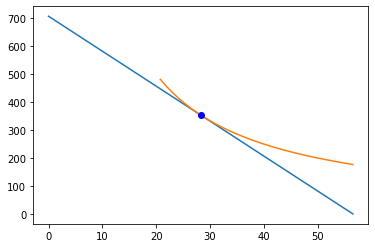

In [157]:
plt.plot(x1s, budgetline)
plt.plot(x1s, utils)
plt.plot(res.x[0],res.x[1],ls='',marker='o',color='blue',label='loop')
plt.show()